In [2]:
import pickle
import os


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.initializers import he_normal
from keras import optimizers
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras.utils.data_utils import get_file
from keras import backend as K

Using TensorFlow backend.


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:


train_images.shape



(60000, 28, 28)

In [6]:


len(train_labels)



60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

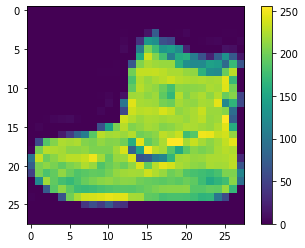

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

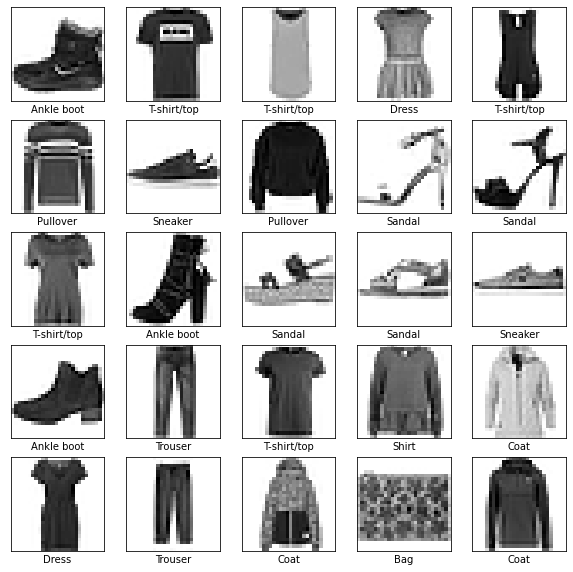

In [12]:


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4972 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3382 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3506 - accuracy: 0.8755

Test accuracy: 0.8755000233650208


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [0]:
predictions = probability_model.predict(test_images)

In [19]:

predictions[0]

array([1.61991102e-05, 3.52174470e-11, 1.87787617e-08, 1.37943444e-12,
       1.70843534e-10, 9.64727905e-03, 6.84815006e-07, 2.00739130e-03,
       1.34137945e-08, 9.88328457e-01], dtype=float32)

In [20]:

np.argmax(predictions[0])

9

In [21]:

test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

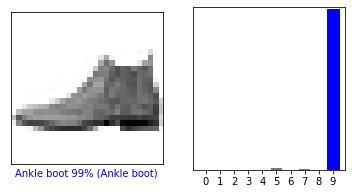

In [23]:

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

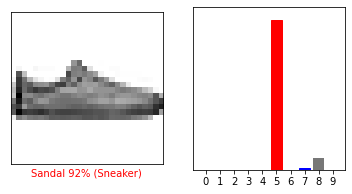

In [24]:

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

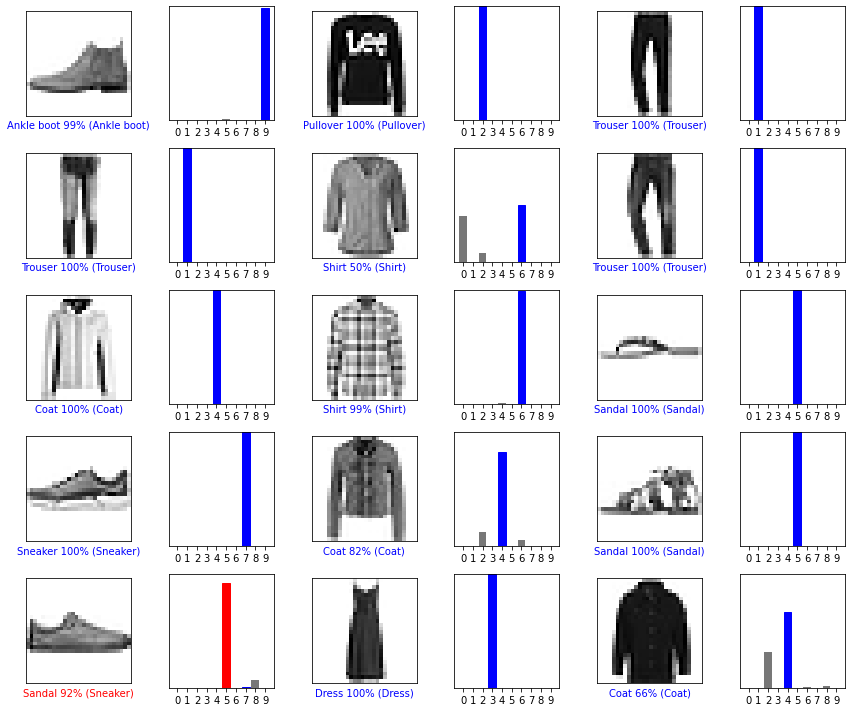

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:

predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.7632685e-05 1.3854554e-12 9.9972588e-01 3.1008829e-09 7.8932841e-05
  7.5466261e-13 9.7561300e-05 2.0310308e-13 2.7971190e-11 5.4571972e-13]]


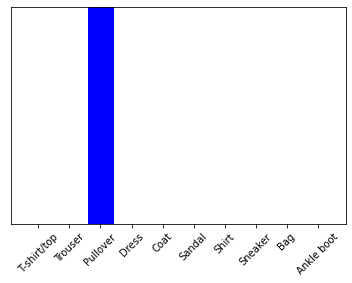

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

2

In [0]:
#-----data dir----
data_dir = "./data"
#-----------------

In [0]:
def scheduler(epoch):
  learning_rate_init = 0.001
  if epoch > 42:
    learning_rate_init = 0.0002
  if epoch > 52:
    learning_rate_init = 0.00005
  return learning_rate_init

def unpickle(filename):
  file = os.path.join(data_dir, filename)
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict

class LossWeightsModifier(keras.callbacks.Callback):
  def __init__(self, alpha, beta, gamma):
    self.alpha = alpha
    self.beta = beta
    self.gamma = gamma
    # customize your behavior
  def on_epoch_end(self, epoch, logs={}):
    if epoch == 15:
      K.set_value(self.alpha, 0.1)
      K.set_value(self.beta, 0.8)
      K.set_value(self.gamma, 0.1)
    if epoch == 25:
      K.set_value(self.alpha, 0.1)
      K.set_value(self.beta, 0.2)
      K.set_value(self.gamma, 0.7)
    if epoch == 35:
      K.set_value(self.alpha, 0)
      K.set_value(self.beta, 0)
      K.set_value(self.gamma, 1)

In [0]:
#-------- dimensions ---------
height, width = 28, 28
channel = 1
if K.image_data_format() == 'channels_first':
    input_shape = (channel, height, width)
else:
    input_shape = (height, width, channel)
#-----------------------------

In [0]:
train_size = 60000
test_size = 10000

#--- coarse 1 classes ---
coarse1_classes = 2
#--- coarse 2 classes ---
coarse2_classes = 6
#--- fine classes ---
num_classes  = 10

batch_size   = 128
epochs       = 60

In [0]:
#--- file paths ---
log_filepath = './tb_log_vgg19_hierarchy_dynamic/'
weights_store_filepath = './vgg19_weights_hierarchy_dynamic/'
retrain_id = '101'
model_name = 'weights_vgg19_dynamic_cifar_100_'+retrain_id+'.h5'
model_path = os.path.join(weights_store_filepath, model_name)

In [36]:
#----------get VGG19 pre-trained weights--------
WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
weights_path = get_file('vgg19_weights_tf_dim_ordering_tf_kernels.h5',
                         WEIGHTS_PATH,
                         cache_subdir='models')


574717952/574710816 [==============================] - 27s 0us/step


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names_c1 = ['Clothes', 'Goods']
class_names_c2 = ['Tops', 'Bottoms', 'Dresses', 'Outers', 'Accessories', 'Shoes']

In [0]:
c2_to_c1 = {0:0, 1:0, 2:0, 3:0, 4:1, 5:1}
fine_to_c2 = {0:0, 1:1, 2:0, 3:2, 4:3, 5:5, 6:0, 7:5, 8:4, 9:5}

In [0]:
def print_mappings(mapping, source, dest):
    for k,v in mapping.items():
        print(source[k], "->", dest[v])

In [40]:
print_mappings(c2_to_c1, class_names_c2, class_names_c1)
print("-"*10)
print_mappings(fine_to_c2, class_names, class_names_c2)

Tops -> Clothes
Bottoms -> Clothes
Dresses -> Clothes
Outers -> Clothes
Accessories -> Goods
Shoes -> Goods
----------
T-shirt/top -> Tops
Trouser -> Bottoms
Pullover -> Tops
Dress -> Dresses
Coat -> Outers
Sandal -> Shoes
Shirt -> Tops
Sneaker -> Shoes
Bag -> Accessories
Ankle boot -> Shoes


In [41]:
train_images.shape

(60000, 28, 28)

In [42]:
train_labels_fine = to_categorical(train_labels)
train_labels_fine.shape

(60000, 10)

In [43]:
test_labels_fine = to_categorical(test_labels)
test_labels_fine.shape

(10000, 10)

In [44]:
train_labels_c2_index = [fine_to_c2[i] for i in train_labels]
train_labels_c2 = to_categorical(train_labels_c2_index)
train_labels_c2.shape

(60000, 6)

In [45]:
test_labels_c2_index = [fine_to_c2[i] for i in test_labels]
test_labels_c2 = to_categorical(test_labels_c2_index)
test_labels_c2.shape

(10000, 6)

In [46]:
train_labels_c1_index = [c2_to_c1[i] for i in train_labels_c2_index]
train_labels_c1 = to_categorical(train_labels_c1_index)
train_labels_c1.shape

(60000, 2)

In [47]:
test_labels_c1_index = [c2_to_c1[i] for i in test_labels_c2_index]
test_labels_c1 = to_categorical(test_labels_c1_index)
test_labels_c1.shape

(10000, 2)

In [0]:
x_train = train_images[..., np.newaxis]/255.0
x_test = test_images[..., np.newaxis]/255.0

y_train = train_labels_fine
y_test = test_labels_fine

y_c1_train = train_labels_c1
y_c1_test = test_labels_c1

y_c2_train = train_labels_c2
y_c2_test = test_labels_c2

In [49]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("y_c1_train shape: ", y_c1_train.shape)
print("y_c1_test shape: ", y_c1_test.shape)
print("y_c2_train shape: ", y_c2_train.shape)
print("y_c2_test shape: ", y_c2_test.shape)

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)
y_train shape:  (60000, 10)
y_test shape:  (10000, 10)
y_c1_train shape:  (60000, 2)
y_c1_test shape:  (10000, 2)
y_c2_train shape:  (60000, 6)
y_c2_test shape:  (10000, 6)


In [50]:
#----------------------- model definition ---------------------------
alpha = K.variable(value=0.98, dtype="float32", name="alpha") # A1 in paper
beta = K.variable(value=0.01, dtype="float32", name="beta") # A2 in paper
gamma = K.variable(value=0.01, dtype="float32", name="gamma") # A3 in paper

img_input = Input(shape=input_shape, name='input')
img_input

<tf.Tensor 'input:0' shape=(None, 28, 28, 1) dtype=float32>

In [0]:
#--- block 1 ---
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

#--- block 2 ---
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

#--- coarse 1 branch ---
c_1_bch = Flatten(name='c1_flatten')(x)
c_1_bch = Dense(256, activation='relu', name='c1_fc_cifar10_1')(c_1_bch)
c_1_bch = BatchNormalization()(c_1_bch)
c_1_bch = Dropout(0.5)(c_1_bch)
c_1_bch = Dense(256, activation='relu', name='c1_fc2')(c_1_bch)
c_1_bch = BatchNormalization()(c_1_bch)
c_1_bch = Dropout(0.5)(c_1_bch)
c_1_pred = Dense(coarse1_classes, activation='softmax', name='c1_predictions_cifar10')(c_1_bch)

#--- block 3 ---
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

#--- coarse 2 branch ---
c_2_bch = Flatten(name='c2_flatten')(x)
c_2_bch = Dense(1024, activation='relu', name='c2_fc_cifar100_1')(c_2_bch)
c_2_bch = BatchNormalization()(c_2_bch)
c_2_bch = Dropout(0.5)(c_2_bch)
c_2_bch = Dense(1024, activation='relu', name='c2_fc2')(c_2_bch)
c_2_bch = BatchNormalization()(c_2_bch)
c_2_bch = Dropout(0.5)(c_2_bch)
c_2_pred = Dense(coarse2_classes, activation='softmax', name='c2_predictions_cifar100')(c_2_bch)

#--- block 4 ---
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)


#--- block 5 ---
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4')(x)
x = BatchNormalization()(x)

#--- fine block ---
x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc_cifar100_1')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', name='fc_cifar100_2')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
fine_pred = Dense(num_classes, activation='softmax', name='predictions_cifar100')(x)

model = Model(img_input, [c_1_pred, c_2_pred, fine_pred], name='vgg19_hierarchy')
#model.load_weights(weights_path, by_name=True)

In [0]:
#----------------------- compile and fit ---------------------------
sgd = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd, 
              loss_weights=[alpha, beta, gamma], 
              # optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
change_lw = LossWeightsModifier(alpha, beta, gamma)
cbks = [change_lr, tb_cb, change_lw]

model.fit(x_train, [y_c1_train, y_c2_train, y_train],
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=cbks,
          validation_data=(x_test, [y_c1_test, y_c2_test, y_test]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0972 - c1_predictions_cifar10_loss: 0.0564 - c2_predictions_cifar100_loss: 1.4974 - predictions_cifar100_loss: 2.6957 - c1_predictions_cifar10_accuracy: 0.9814 - c2_predictions_cifar100_accuracy: 0.5238 - predictions_cifar100_accuracy: 0.2698 - val_loss: 0.1096 - val_c1_predictions_cifar10_loss: 0.0760 - val_c2_predictions_cifar100_loss: 1.4762 - val_predictions_cifar100_loss: 2.2220 - val_c1_predictions_cifar10_accuracy: 0.9733 - val_c2_predictions_cifar100_accuracy: 0.4295 - val_predictions_cifar100_accuracy: 0.2011
Epoch 2/60
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0459 - c1_predictions_cifar10_loss: 0.0261 - c2_predictions_cifar100_loss: 0.6937 - predictions_cifar100_loss: 1.3324 - c1_predictions_cifar10_accuracy: 0.9924 - c2_predictions_cifar100_accuracy: 0.7669 - predictions_cifar100_accuracy: 0.5928 - val_loss: 0.0278 - 

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              # optimizer=keras.optimizers.Adadelta(),
              optimizer=sgd, 
              metrics=['accuracy'])

model.save(model_path)
score = model.evaluate(x_test, [y_c1_test, y_c2_test, y_test], verbose=0)
print('score is: ', score)

In [1]:
import numpy as np
import pandas as pd

In [15]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
confusion_matrix = np.array([[873,   0,  16,  14,   4,   1,  85,   0,   7,   0],
       [  1, 986,   1,   8,   2,   0,   0,   0,   2,   0],
       [ 15,   0, 908,   8,  31,   0,  38,   0,   0,   0],
       [ 11,   1,   8, 948,  15,   0,  17,   0,   0,   0],
       [  0,   1,  30,  20, 912,   0,  36,   0,   1,   0],
       [  0,   0,   0,   0,   0, 983,   0,  11,   1,   5],
       [ 88,   0,  45,  17,  59,   0, 787,   0,   4,   0],
       [  0,   0,   0,   0,   0,   2,   0, 986,   0,  12],
       [  1,   0,   0,   4,   2,   1,   2,   1, 989,   0],
       [  1,   0,   0,   0,   0,   5,   0,  30,   0, 964]])

In [4]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
confusion_matrix

array([[873,   0,  16,  14,   4,   1,  85,   0,   7,   0],
       [  1, 986,   1,   8,   2,   0,   0,   0,   2,   0],
       [ 15,   0, 908,   8,  31,   0,  38,   0,   0,   0],
       [ 11,   1,   8, 948,  15,   0,  17,   0,   0,   0],
       [  0,   1,  30,  20, 912,   0,  36,   0,   1,   0],
       [  0,   0,   0,   0,   0, 983,   0,  11,   1,   5],
       [ 88,   0,  45,  17,  59,   0, 787,   0,   4,   0],
       [  0,   0,   0,   0,   0,   2,   0, 986,   0,  12],
       [  1,   0,   0,   4,   2,   1,   2,   1, 989,   0],
       [  1,   0,   0,   0,   0,   5,   0,  30,   0, 964]])

In [26]:
df = pd.DataFrame(confusion_matrix, class_names, class_names)
from IPython.core.display import HTML
HTML("<style>.rendered_html th {max-width: 20px;}</style>")
# df.style.set_table_styles([dict(selector="th",props=[('max-width', '10px')])])
df

,T-shirt,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt,873,0,16,14,4,1,85,0,7,0
Trouser,1,986,1,8,2,0,0,0,2,0
Pullover,15,0,908,8,31,0,38,0,0,0
Dress,11,1,8,948,15,0,17,0,0,0
Coat,0,1,30,20,912,0,36,0,1,0
Sandal,0,0,0,0,0,983,0,11,1,5
Shirt,88,0,45,17,59,0,787,0,4,0
Sneaker,0,0,0,0,0,2,0,986,0,12
Bag,1,0,0,4,2,1,2,1,989,0
Ankle boot,1,0,0,0,0,5,0,30,0,964
